In [69]:
# from IPython.core.debugger import set_trace
from graphviz import Graph
from io import StringIO

def plotTree(chaine):
    dot = Graph(comment='Tree')
    dot.node_attr.update(fillcolor='white', style='filled')
    dot.node_attr.update(shape='circle', heigth = '0.6', width='0.6',fixedsize='true')
    dot.attr(bgcolor='transparent',splines='curved')
    s = chaine.replace(" ","")
        
#   set_trace()

    sio = StringIO(s)
    c = sio.read(1)
    if c == "(":
        newick2tree(dot,sio,None,0)
    else:
        print("Init error")
        
    dot.engine = 'dot'        
    dot.render('tmp/tree.gv', view=True)
    return dot

limits = "(,)"

def newick2tree(dot,flux,parent,i): 

    c = ","
    while c == ",":
        s = ""
        c = flux.read(1)
        while not c in limits:
            s += c
            c = flux.read(1)
            
        i = i + 1
        if s != "None":
            dot.node(str(i),s,fontname='courier',fontsize='22')
        else:
            dot.node(str(i),s,fontname='courier',fontsize='22',style='invisible')
                
        if parent != None:
            dot.edge(str(parent),str(i))
        
        if c == "(":
            i = newick2tree(dot,flux,i,i) 
            c = flux.read(1)
    
    return i

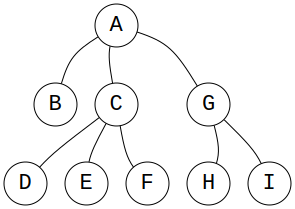

In [70]:
T = "(A(B,C(D,E,F),G(H,I)))"
plotTree(T)

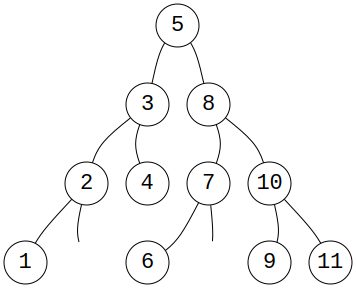

In [66]:
T = "(5(3(2(1,None),4),8(7(6,None),10(9,11))))"
plotTree(T)